## Task 

Task 1: Using the results of task 6 in the previous research question, engineer features to describe the changes in demographics from 2014 to 2019 in Hillsborough County, FL. (For example, a binary ">10% change from 2014" variable - use whatever features or buckets make the most sense to you. Get creative!)


In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in data

county = "hillsborough"
acs_dic = pd.read_csv('American Community Survey Data/acs5_variable_dict_2014_2019.csv')
data_2014_df = pd.read_csv(f"American Community Survey Data/{county}_acs5-2014_census.csv")
data_2019_df = pd.read_csv(f"American Community Survey Data/{county}_acs5-2019_census.csv")

data_2014_df.head()

,index,DP02_0001E,DP02_0001PE,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,...,B25087_027E,B25087_028E,B25087_029E,B25088_001E,B25088_002E,B25088_003E,B25092_001E,B25092_002E,B25092_003E,GEOID
0,"Census Tract 111.03, Hillsborough County, Flor...",1268,1268,1012,79.8,374,29.5,826,65.1,302,...,86,9,161,1452,1944,555,17.9,22.3,11.5,12057011103
1,"Census Tract 114.08, Hillsborough County, Flor...",1078,1078,811,75.2,332,30.8,692,64.2,288,...,37,8,77,1512,1666,656,22.4,23.6,13.1,12057011408
2,"Census Tract 114.13, Hillsborough County, Flor...",2111,2111,1444,68.4,704,33.3,1012,47.9,465,...,37,12,71,1476,1776,455,23.3,26.6,14.8,12057011413
3,"Census Tract 116.08, Hillsborough County, Flor...",428,428,319,74.5,146,34.1,272,63.6,110,...,4,10,46,1603,1866,711,21.2,21.5,19.2,12057011608
4,"Census Tract 116.11, Hillsborough County, Flor...",1596,1596,990,62.0,438,27.4,609,38.2,241,...,37,46,17,1032,1187,437,22.7,24.3,16.8,12057011611


In [3]:
data_2019_df.head()

,index,DP02_0001E,DP02_0001PE,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,...,B25087_037E,B25087_038E,B25087_039E,B25088_001E,B25088_002E,B25088_003E,B25092_001E,B25092_002E,B25092_003E,GEOID
0,"Census Tract 4.01, Hillsborough County, Florid...",926,926,294,31.7,124,13.4,96,10.4,18,...,0,0,0,991,1172,359,19.9,26.3,9.0,12057000401
1,"Census Tract 101.05, Hillsborough County, Flor...",1496,1496,921,61.6,325,21.7,78,5.2,52,...,0,0,10,866,1549,391,17.3,23.3,9.0,12057010105
2,"Census Tract 102.03, Hillsborough County, Flor...",766,766,222,29.0,40,5.2,56,7.3,39,...,0,0,0,608,1155,263,18.6,21.9,15.7,12057010203
3,"Census Tract 106, Hillsborough County, Florida...",1108,1108,598,54.0,244,22.0,48,4.3,9,...,0,0,15,1241,1584,566,14.2,16.9,9.0,12057010600
4,"Census Tract 23, Hillsborough County, Florida:...",1419,1419,606,42.7,213,15.0,131,9.2,38,...,0,0,10,1174,1400,408,17.8,18.7,14.2,12057002300


In [4]:
acs_dic.head()

,variable_code,label,concept,predicateType,group,limit,predicateOnly,acs_year
0,DP02_0019EA,Annotation of Estimate!!RELATIONSHIP!!Populati...,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0,True,2014
1,DP02_0126E,Estimate!!ANCESTRY!!Total population!!Danish,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int,DP02,0,True,2014
2,DP02_0072EA,Annotation of Estimate!!DISABILITY STATUS OF T...,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0,True,2014
3,DP02_0069PMA,Annotation of Percent Margin of Error!!VETERAN...,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0,True,2014
4,DP02_0126M,Margin of Error!!ANCESTRY!!Total population!!D...,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int,DP02,0,True,2014


In [5]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

cols_in_both = intersection(data_2014_df.columns, data_2019_df.columns)
len(cols_in_both)

1552

In [9]:
## significance tests to see which variables changed between 2014 and 2019 
## t test of means 
## income and unemployment important for housing
alpha = 0.05
statistically_signficant_codes = []


for col in cols_in_both:
    if col != "index":
        t = stats.ttest_rel(data_2014_df[col],  data_2019_df[col].astype(data_2014_df[col].dtype))
        if t.pvalue < alpha:
            statistically_signficant_codes.append(col)
            
len(statistically_signficant_codes)

860

In [29]:
alpha = 0.05
statistically_insignficant_codes = []


for col in cols_in_both:
    if col != "index":
        t = stats.ttest_rel(data_2014_df[col],  data_2019_df[col].astype(data_2014_df[col].dtype))
        if t.pvalue > alpha:
            statistically_insignficant_codes.append(col)
            
len(statistically_insignficant_codes)

655

In [33]:
alpha = 0.001
statistically_insignficant_codes = []


for col in cols_in_both:
    if col != "index":
        t = stats.ttest_rel(data_2014_df[col],  data_2019_df[col].astype(data_2014_df[col].dtype))
        if t.pvalue > alpha:
            statistically_insignficant_codes.append(col)
            
len(statistically_insignficant_codes)

972

In [10]:
'DP04_0037E' in statistically_signficant_codes

True

In [11]:
acs_dic[acs_dic.variable_code=='DP04_0037E']

,variable_code,label,concept,predicateType,group,limit,predicateOnly,acs_year
2456,DP04_0037E,Estimate!!BEDROOMS!!Total housing units,SELECTED HOUSING CHARACTERISTICS,int,DP04,0,True,2014
6554,DP04_0037E,Estimate!!ROOMS!!Total housing units!!Median r...,SELECTED HOUSING CHARACTERISTICS,float,DP04,0,True,2019


DP02_0001E
[[2014 'Estimate!!HOUSEHOLDS BY TYPE!!Total households']
 [2019 'Estimate!!HOUSEHOLDS BY TYPE!!Total households']]


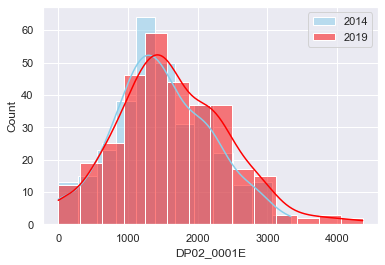

In [13]:
code = statistically_signficant_codes[0]
print(code)
print(acs_dic[acs_dic.variable_code==code][['acs_year', 'label']].values)

sns.set(style="darkgrid")

sns.histplot(data=data_2014_df, x=code, color="skyblue", label="2014", kde=True)
sns.histplot(data=data_2019_df, x=code, color="red", label="2019", kde=True)

plt.legend() 
plt.show()

In [14]:
print(statistically_signficant_codes[100])
print(acs_dic[acs_dic.variable_code==statistically_signficant_codes[100]][['acs_year', 'label']].values)

print(data_2014_df[statistically_signficant_codes[100]][0:5], data_2019_df[statistically_signficant_codes[100]][0:5])

DP02_0079PE
[[2014
  'Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house']
 [2019 'Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over']]
0    88.0
1    89.6
2    87.9
3    73.5
4    95.1
Name: DP02_0079PE, dtype: float64 0    2621
1    4725
2    1904
3    3394
4    3243
Name: DP02_0079PE, dtype: int64


B25087_029E
[]


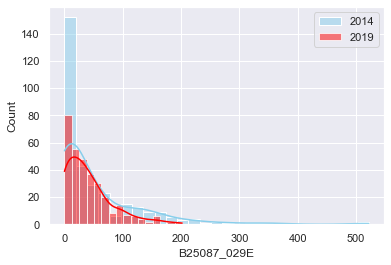

In [15]:
code = statistically_signficant_codes[-1]
print(code)
print(acs_dic[acs_dic.variable_code==code][['acs_year', 'label']].values)

sns.set(style="darkgrid")

sns.histplot(data=data_2014_df, x=code, color="skyblue", label="2014", kde=True)
sns.histplot(data=data_2019_df, x=code, color="red", label="2019", kde=True)

plt.legend() 
plt.show()

B25087_023E
[]


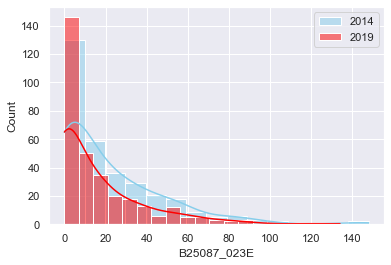

In [16]:
code = statistically_signficant_codes[-5]
print(code)
print(acs_dic[acs_dic.variable_code==code][['acs_year', 'label']].values)

sns.set(style="darkgrid")

sns.histplot(data=data_2014_df, x=code, color="skyblue", label="2014", kde=True)
sns.histplot(data=data_2019_df, x=code, color="red", label="2019", kde=True)

plt.legend() 
plt.show()

In [17]:
labeled_type_matched_statistically_signficant_codes = intersection(statistically_signficant_codes, list(acs_dic[~acs_dic.label.isna()]['variable_code']))

len(labeled_type_matched_statistically_signficant_codes)

522

DP02_0005E
[[2014
  'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family!!With own children under 18 years']
 [2019
  'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household!!With own children of the householder under 18 years']]


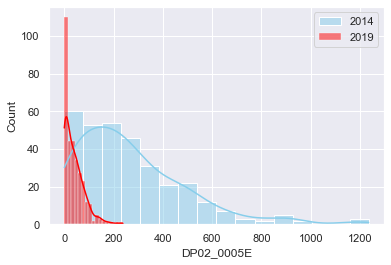

In [18]:
code = labeled_type_matched_statistically_signficant_codes[5]
print(code)
print(acs_dic[acs_dic.variable_code==code][['acs_year', 'label']].values)

sns.set(style="darkgrid")

sns.histplot(data=data_2014_df, x=code, color="skyblue", label="2014", kde=True)
sns.histplot(data=data_2019_df, x=code, color="red", label="2019", kde=True)

plt.legend() 
plt.show()

DP02_0011E
[[2014
  'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone']
 [2019
  'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Female householder, no spouse/partner present!!With own children of the householder under 18 years']]


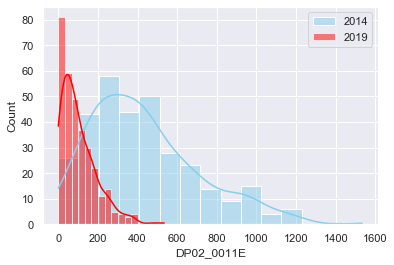

In [19]:
code = labeled_type_matched_statistically_signficant_codes[10]
print(code)
print(acs_dic[acs_dic.variable_code==code][['acs_year', 'label']].values)

sns.set(style="darkgrid")

sns.histplot(data=data_2014_df, x=code, color="skyblue", label="2014", kde=True)
sns.histplot(data=data_2019_df, x=code, color="red", label="2019", kde=True)

plt.legend() 
plt.show()

In [26]:
acs_dic.concept.unique()

array(['SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES',
       'SELECTED ECONOMIC CHARACTERISTICS',
       'SELECTED HOUSING CHARACTERISTICS',
       'ACS DEMOGRAPHIC AND HOUSING ESTIMATES'], dtype=object)

In [20]:
nhpd_with_housingloss = pd.read_excel("nhpd_with_housingloss.xlsx")
nhpd_with_housingloss.head()

,Unnamed: 0,NumberInconclusiveHUDInsured,EarliestConstructionDate,TotalUnits,NumberInactiveLihtc,EarliestEndDate,NumberActiveHUDInsured,NumberInactiveHud,ManagerName,NumberActiveState,...,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,0,0,1979-01-01,21,0,2022-06-30,0,0,WELLER WORKFORCE LLC,0,...,0.0,1.444604,0.598472,0.989825,1.439467,0.902985,0.799893,12086,Miami-Dade County,Florida
1,1,0,1979-01-01,24,0,2022-02-28,0,0,CENTURION MANAGEMENT & CONSULTING SERVICES LLC,0,...,0.0,1.444604,0.598472,0.989825,1.439467,0.902985,0.799893,12086,Miami-Dade County,Florida
2,2,0,NaT,95,0,2046-01-01,0,0,MIAMI DADE PUBLIC HOUSING AND COMMUNITY DEV,0,...,0.0,1.444604,0.598472,0.989825,1.439467,0.902985,0.799893,12086,Miami-Dade County,Florida
3,3,0,1997-01-01,100,0,2038-12-31,0,0,CNC MANAGEMENT INC,1,...,0.0,1.444604,0.598472,0.989825,1.439467,0.902985,0.799893,12086,Miami-Dade County,Florida
4,4,0,1979-01-01,30,0,2021-09-30,0,0,TLGJ PROPERTIES INC,0,...,0.0,1.444604,0.598472,0.989825,1.439467,0.902985,0.799893,12086,Miami-Dade County,Florida


In [21]:
## codes with the same labels from 2014 to 2019
acs_dic_compare = pd.read_csv("acs_dic_compare.csv") # other notebook
acs_dic_compare.head()

,Unnamed: 0,variable_code,label_14,concept_14,predicateType_14,group_14,limit_14,predicateOnly_14,acs_year_14,label_19,...,predicateOnly_19,acs_year_19,datasets,concept_match,predicateType_match,predicateOnly_match,label_match,label_same,label_14_diff,label_19_diff
0,0,DP02_0019EA,"['ANNOTATION OF ESTIMATE', 'RELATIONSHIP', 'PO...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0.0,True,2014.0,"['ANNOTATION OF ESTIMATE', 'RELATIONSHIP', 'PO...",...,True,2019.0,NaN,True,True,True,False,"['POPULATION IN HOUSEHOLDS', 'ANNOTATION OF ES...",['SPOUSE'],['HOUSEHOLDER']
1,1,DP02_0126E,"['ESTIMATE', 'ANCESTRY', 'TOTAL POPULATION', '...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int,DP02,0.0,True,2014.0,"['ESTIMATE', 'ANCESTRY', 'TOTAL POPULATION', '...",...,True,2019.0,"hill_14, miami_dade_14, orange_14, hill_19, mi...",True,True,True,False,"['ANCESTRY', 'ESTIMATE', 'TOTAL POPULATION']",['DANISH'],['CZECH']
2,2,DP02_0072EA,"['ANNOTATION OF ESTIMATE', 'DISABILITY STATUS ...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0.0,True,2014.0,"['ANNOTATION OF ESTIMATE', 'DISABILITY STATUS ...",...,True,2019.0,NaN,True,True,True,False,['DISABILITY STATUS OF THE CIVILIAN NONINSTITU...,['UNDER 18 YEARS'],['TOTAL CIVILIAN NONINSTITUTIONALIZED POPULATI...
3,3,DP02_0069PMA,"['ANNOTATION OF PERCENT MARGIN OF ERROR', 'VET...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0.0,True,2014.0,"['ANNOTATION OF PERCENT MARGIN OF ERROR', 'VET...",...,True,2019.0,NaN,True,True,True,False,"['ANNOTATION OF PERCENT MARGIN OF ERROR', 'VET...",['CIVILIAN VETERANS'],[]
4,4,DP02_0126M,"['MARGIN OF ERROR', 'ANCESTRY', 'TOTAL POPULAT...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int,DP02,0.0,True,2014.0,"['MARGIN OF ERROR', 'ANCESTRY', 'TOTAL POPULAT...",...,True,2019.0,NaN,True,True,True,False,"['MARGIN OF ERROR', 'ANCESTRY', 'TOTAL POPULAT...",['DANISH'],['CZECH']


In [23]:
def same_code(row):
    if row['label_14'] == row['label_19']:
        return 1
    else:
        return 0

acs_dic_compare["same_label"] = acs_dic_compare.apply(lambda row: same_code(row), axis=1)
acs_dic_compare.head()

,Unnamed: 0,variable_code,label_14,concept_14,predicateType_14,group_14,limit_14,predicateOnly_14,acs_year_14,label_19,...,acs_year_19,datasets,concept_match,predicateType_match,predicateOnly_match,label_match,label_same,label_14_diff,label_19_diff,same_label
0,0,DP02_0019EA,"['ANNOTATION OF ESTIMATE', 'RELATIONSHIP', 'PO...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0.0,True,2014.0,"['ANNOTATION OF ESTIMATE', 'RELATIONSHIP', 'PO...",...,2019.0,NaN,True,True,True,False,"['POPULATION IN HOUSEHOLDS', 'ANNOTATION OF ES...",['SPOUSE'],['HOUSEHOLDER'],0
1,1,DP02_0126E,"['ESTIMATE', 'ANCESTRY', 'TOTAL POPULATION', '...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int,DP02,0.0,True,2014.0,"['ESTIMATE', 'ANCESTRY', 'TOTAL POPULATION', '...",...,2019.0,"hill_14, miami_dade_14, orange_14, hill_19, mi...",True,True,True,False,"['ANCESTRY', 'ESTIMATE', 'TOTAL POPULATION']",['DANISH'],['CZECH'],0
2,2,DP02_0072EA,"['ANNOTATION OF ESTIMATE', 'DISABILITY STATUS ...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0.0,True,2014.0,"['ANNOTATION OF ESTIMATE', 'DISABILITY STATUS ...",...,2019.0,NaN,True,True,True,False,['DISABILITY STATUS OF THE CIVILIAN NONINSTITU...,['UNDER 18 YEARS'],['TOTAL CIVILIAN NONINSTITUTIONALIZED POPULATI...,0
3,3,DP02_0069PMA,"['ANNOTATION OF PERCENT MARGIN OF ERROR', 'VET...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,string,DP02,0.0,True,2014.0,"['ANNOTATION OF PERCENT MARGIN OF ERROR', 'VET...",...,2019.0,NaN,True,True,True,False,"['ANNOTATION OF PERCENT MARGIN OF ERROR', 'VET...",['CIVILIAN VETERANS'],[],0
4,4,DP02_0126M,"['MARGIN OF ERROR', 'ANCESTRY', 'TOTAL POPULAT...",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int,DP02,0.0,True,2014.0,"['MARGIN OF ERROR', 'ANCESTRY', 'TOTAL POPULAT...",...,2019.0,NaN,True,True,True,False,"['MARGIN OF ERROR', 'ANCESTRY', 'TOTAL POPULAT...",['DANISH'],['CZECH'],0


In [25]:
acs_dic_compare[['same_label', 'variable_code']].groupby('same_label').count()

,variable_code
same_label,
0,3632
1,1115


In [30]:
same_label_significant_codes = intersection(list(acs_dic_compare[acs_dic_compare["same_label"]==1]['variable_code']), statistically_signficant_codes)
same_label_insignificant_codes = intersection(list(acs_dic_compare[acs_dic_compare["same_label"]==1]['variable_code']), statistically_insignficant_codes)
        
    
len(same_label_significant_codes), len(same_label_insignificant_codes)                                          

(389, 273)

DP03_0008E
[[2014 'Estimate!!EMPLOYMENT STATUS!!Civilian labor force']
 [2019 'Estimate!!EMPLOYMENT STATUS!!Civilian labor force']]


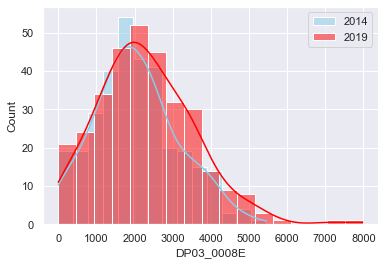

In [27]:
code = same_label_significant_codes[10]
print(code)
print(acs_dic[acs_dic.variable_code==code][['acs_year', 'label']].values)

sns.set(style="darkgrid")

sns.histplot(data=data_2014_df, x=code, color="skyblue", label="2014", kde=True)
sns.histplot(data=data_2019_df, x=code, color="red", label="2019", kde=True)

plt.legend() 
plt.show()

DP02_0001PE
[[2014 'Percent!!HOUSEHOLDS BY TYPE!!Total households']
 [2019 'Percent!!HOUSEHOLDS BY TYPE!!Total households']]


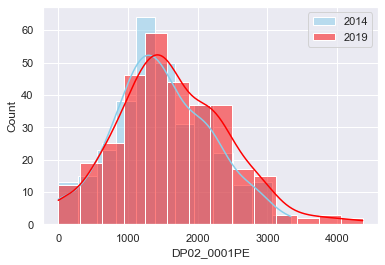

In [28]:
code = same_label_significant_codes[0]
print(code)
print(acs_dic[acs_dic.variable_code==code][['acs_year', 'label']].values)

sns.set(style="darkgrid")

sns.histplot(data=data_2014_df, x=code, color="skyblue", label="2014", kde=True)
sns.histplot(data=data_2019_df, x=code, color="red", label="2019", kde=True)

plt.legend() 
plt.show()

In [ ]:
neg_corr_codes = ['DP05_0017E'] # Jeff
pos_corr_codes = ['DP02_0035E', 'DP02_0047E', 'DP04_0058E', 'DP04_0074E', 'DP05_0036E', 'DP05_0042E'] # from Jeff

# DP02_0035E        0.114437
# DP02_0047E        0.136243
# DP04_0058E        0.231741
# DP04_0074E        0.130155
# DP05_0036E        0.251043
# DP05_0042E        0.313947